<h3> This file contains code for various classification models with Latent Semantic Indexing.<br>
Code By:<br>
Konark J S Kumar - 204759469<br>
Shreyas Lakhe - 105026650
</h3>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import shuffle
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

<b>Two major classes 'Computer Technology' and 'Recreational Activity' and their subclasses. </b>

In [2]:
computer_technology = ['comp.graphics', 
                       'comp.os.ms-windows.misc', 
                       'comp.sys.ibm.pc.hardware', 
                       'comp.sys.mac.hardware']

recreational_activity = [ 'rec.autos', 
                         'rec.motorcycles', 
                         'rec.sport.baseball', 
                         'rec.sport.hockey' ]

In [3]:
target_names = ['computer_technology', 'recreational_activity']

<b>Generating Training Data</b>

In [4]:
ct_train_x = fetch_20newsgroups(subset='train', categories=computer_technology, shuffle=True, random_state=42)
ra_train_x = fetch_20newsgroups(subset='train', categories=recreational_activity, shuffle=True, random_state=42)

comb_train_x = ct_train_x.data + ra_train_x.data

In [5]:
ct_train_y = [0] * len(ct_train_x.target)
ra_train_y = [1] * len(ra_train_x.target)

train_y = ct_train_y + ra_train_y

<b>Generating Test Data</b>

In [6]:
ct_test_x = fetch_20newsgroups(subset='test', categories=computer_technology, shuffle=True, random_state=42)
ra_test_x = fetch_20newsgroups(subset='test', categories=recreational_activity, shuffle=True, random_state=42)

comb_test_x = ct_test_x.data + ra_test_x.data

In [7]:
ct_test_y = [0] * len(ct_test_x.target)
ra_test_y = [1] * len(ra_test_x.target)

test_y = ct_test_y + ra_test_y

<b>Pre-process data function</b>

In [8]:
def preprocess_data(data):
        letters_only = re.sub("[^a-zA-Z]", " ", data)
        words = letters_only.split()
        ps = PorterStemmer()
        words = [ps.stem(w).lower() for w in words if not w.lower() in stopwords.words('english')]
        return(" ".join( words ))

<b>Pre-processing Training and Test data</b>

In [9]:
preproc_train_data = []

for data in comb_train_x:
	preproc_train_data.append(preprocess_data(data))

In [10]:
preproc_test_data = []

for data in comb_test_x:
	preproc_test_data.append(preprocess_data(data))

<b>Creating a TFxIDF vector representation of training and test data with min_df = 2</b>

In [165]:
vectorizer2 = CountVectorizer(min_df = 2)
tfidf_transformer2 = TfidfTransformer()

In [166]:
vec_train_x2 = vectorizer2.fit_transform(preproc_train_data)
tfidf_train_x2 = tfidf_transformer2.fit_transform(vec_train_x)

In [167]:
vec_test_x2 = vectorizer.transform(preproc_test_data)
tfidf_test_x2 = tfidf_transformer.transform(vec_test_x)

<b>Dimensionality Reduction of Training and Test data using Latent Semantic Indexing (LSI)</b>

In [168]:
svd_model = TruncatedSVD(n_components=50, random_state=0)

In [169]:
train_x2 = svd_model.fit_transform(tfidf_train_x2)

In [170]:
test_x2 = svd_model.transform(tfidf_test_x)

<h3> SVM Hard Margin Classifier</h3>

In [316]:
classifier_hard = svm.SVC(C=1000, probability=True, kernel='linear')
classifier_hard.fit(train_x2, train_y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [317]:
y_predict_hard2 = classifier_hard.predict(test_x2)

In [318]:
y_predict_hard_prob2 = classifier_hard.predict_proba(test_x2)

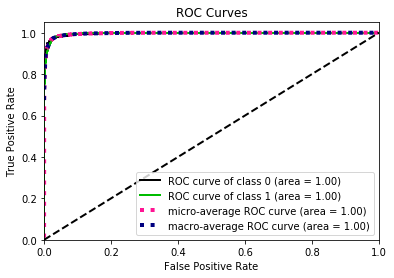

In [319]:
skplt.metrics.plot_roc_curve(test_y, y_predict_hard_prob2)
plt.show()

In [320]:
confusion_matrix(test_y, y_predict_hard2)

array([[1511,   49],
       [  35, 1555]])

In [321]:
print("Accuracy : ", accuracy_score(test_y, y_predict_hard2))
print("Precision : ",precision_score(test_y, y_predict_hard2))
print("Recall : ",recall_score(test_y, y_predict_hard2))

print(classification_report(test_y, y_predict_hard2, target_names=target_names))

('Accuracy : ', 0.97333333333333338)
('Precision : ', 0.96945137157107231)
('Recall : ', 0.9779874213836478)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.97      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



<h3> SVM Soft Margin Classifier</h3>

In [322]:
classifier_soft = svm.SVC(C=0.001, probability=True, kernel='linear')
classifier_soft.fit(train_x2, train_y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [323]:
y_predict_soft2 = classifier_soft.predict(test_x2)

In [324]:
y_predict_soft_prob2 = classifier_soft.predict_proba(test_x2)

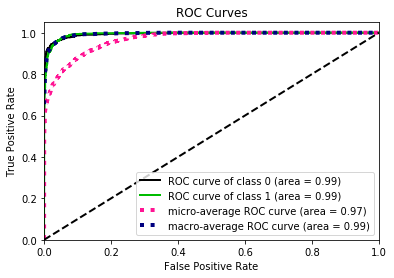

In [325]:
skplt.metrics.plot_roc_curve(test_y, y_predict_soft_prob2)
plt.show()

In [326]:
confusion_matrix(test_y, y_predict_soft2)

array([[   0, 1560],
       [   0, 1590]])

In [327]:
print("Accuracy : ", accuracy_score(test_y, y_predict_soft2))
print("Precision : ",precision_score(test_y, y_predict_soft2))
print("Recall : ",recall_score(test_y, y_predict_soft2))

print(classification_report(test_y, y_predict_soft2, target_names=target_names))

('Accuracy : ', 0.50476190476190474)
('Precision : ', 0.50476190476190474)
('Recall : ', 1.0)
                       precision    recall  f1-score   support

  Computer Technology       0.00      0.00      0.00      1560
Recreational Activity       0.50      1.00      0.67      1590

          avg / total       0.25      0.50      0.34      3150



<h3> Finding the best value of Gamma</h3>

In [328]:
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

target_names = ["Computer Technology", "Recreational Activity"]

In [1]:
for C in gamma_values:
    grid = GridSearchCV(svm.SVC(), param_grid=dict(C=gamma_values, kernel=['linear']), cv=5, scoring = 'accuracy')
    grid.fit(train_x2, train_y)
    print(grid.best_estimator_)

NameError: name 'gamma_values' is not defined

In [330]:
print(grid.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [331]:
y_predict_best2 = grid.predict(test_x2)
print(classification_report(test_y, y_predict_best2, target_names=target_names))
print("Accuracy Score: " + str(accuracy_score(test_y, y_predict_best2)))

                       precision    recall  f1-score   support

  Computer Technology       0.98      0.97      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150

Accuracy Score: 0.972698412698


<h3>Logistic Regression without regularization</h3>

In [332]:
logistic_clf = LogisticRegression(penalty='l2', C=1e10)
logistic_clf.fit(train_x2, train_y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [333]:
y_predict = logistic_clf.predict(test_x2)
y_predict_prob = logistic_clf.predict_proba(test_x2)

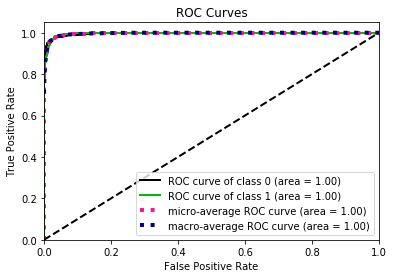

In [334]:
skplt.metrics.plot_roc_curve(test_y, y_predict_prob)
plt.show()

In [335]:
confusion_matrix(test_y, y_predict)

array([[1505,   55],
       [  32, 1558]])

In [336]:
print("Accuracy : ", accuracy_score(test_y, y_predict_log2))
print("Precision : ",precision_score(test_y, y_predict_log2))
print("Recall : ",recall_score(test_y, y_predict_log2))

print(classification_report(test_y, y_predict_log2, target_names=target_names))

('Accuracy : ', 0.96412698412698417)
('Precision : ', 0.95390288875230489)
('Recall : ', 0.97610062893081762)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.95      0.96      1560
Recreational Activity       0.95      0.98      0.96      1590

          avg / total       0.96      0.96      0.96      3150



<h3>Logistic Regression with L2 regularization</h3>

In [337]:
logistic_clf = LogisticRegression(penalty='l2', C=1000)
logistic_clf.fit(train_x2, train_y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [338]:
y_predict = logistic_clf.predict(test_x2)
y_predict_prob = logistic_clf.predict_proba(test_x2)

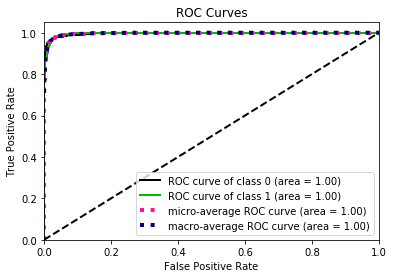

In [339]:
skplt.metrics.plot_roc_curve(test_y, y_predict_prob)
plt.show()

In [340]:
confusion_matrix(test_y, y_predict)

array([[1505,   55],
       [  33, 1557]])

In [341]:
print("Accuracy : ", accuracy_score(test_y, y_predict))
print("Precision : ",precision_score(test_y, y_predict))
print("Recall : ",recall_score(test_y, y_predict))

print(classification_report(test_y, y_predict, target_names=target_names))

('Accuracy : ', 0.97206349206349207)
('Precision : ', 0.96588089330024818)
('Recall : ', 0.97924528301886793)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.96      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



<h3>Logistic Regression with L1 regularization</h3>

In [342]:
logistic_clf = LogisticRegression(penalty='l1', C=1000)
logistic_clf.fit(train_x2, train_y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [343]:
y_predict = logistic_clf.predict(test_x2)

y_predict_prob = logistic_clf.predict_proba(test_x2)

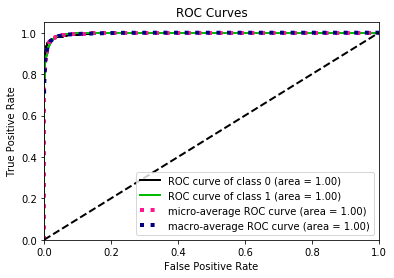

In [344]:
skplt.metrics.plot_roc_curve(test_y, y_predict_prob)
plt.show()

In [345]:
confusion_matrix(test_y, y_predict)

array([[1505,   55],
       [  32, 1558]])

In [346]:
print("Accuracy : ", accuracy_score(test_y, y_predict))
print("Precision : ",precision_score(test_y, y_predict))
print("Recall : ",recall_score(test_y, y_predict))

print(classification_report(test_y, y_predict, target_names=target_names))

('Accuracy : ', 0.97238095238095235)
('Precision : ', 0.96590204587724737)
('Recall : ', 0.97987421383647799)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.96      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



<b>Creating a TFxIDF vector representation of training and test data with min_df = 5</b>

In [347]:
vectorizer5 = CountVectorizer(min_df = 5)
tfidf_transformer5 = TfidfTransformer()

In [348]:
vec_train_x5 = vectorizer5.fit_transform(preproc_train_data)
tfidf_train_x5 = tfidf_transformer5.fit_transform(vec_train_x5)

In [349]:
vec_test_x5 = vectorizer5.transform(preproc_test_data)
tfidf_test_x5 = tfidf_transformer5.transform(vec_test_x5)

<b>Dimensionality Reduction of Training and Test data using Latent Semantic Indexing (LSI)</b>

In [350]:
svd_model5 = TruncatedSVD(n_components=50, random_state=0)

In [351]:
train_x5 = svd_model5.fit_transform(tfidf_train_x5)

In [352]:
test_x5 = svd_model5.transform(tfidf_test_x5)

<h3> SVM Hard Margin Classifier</h3>

In [353]:
classifier_hard5 = svm.SVC(C=1000, probability=True, kernel='linear')
classifier_hard5.fit(train_x5, train_y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [354]:
y_predict_hard5 = classifier_hard5.predict(test_x5)

In [355]:
y_predict_hard_prob5 = classifier_hard5.predict_proba(test_x5)

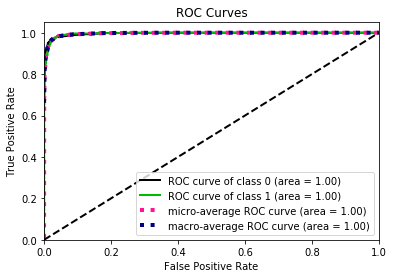

In [356]:
skplt.metrics.plot_roc_curve(test_y, y_predict_hard_prob5)
plt.show()

In [357]:
confusion_matrix(test_y, y_predict_hard5)

array([[1507,   53],
       [  38, 1552]])

In [358]:
print("Accuracy : ", accuracy_score(test_y, y_predict_hard5))
print("Precision : ",precision_score(test_y, y_predict_hard5))
print("Recall : ",recall_score(test_y, y_predict_hard5))

print(classification_report(test_y, y_predict_hard5, target_names=target_names))

('Accuracy : ', 0.97111111111111115)
('Precision : ', 0.96697819314641742)
('Recall : ', 0.97610062893081762)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.97      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



<h3> SVM Soft Margin Classifier</h3>

In [359]:
classifier_soft5 = svm.SVC(C=0.001, probability=True, kernel='linear')
classifier_soft5.fit(train_x5, train_y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [360]:
y_predict_soft5 = classifier_soft5.predict(test_x5)

In [361]:
y_predict_soft_prob5 = classifier_soft5.predict_proba(test_x5)

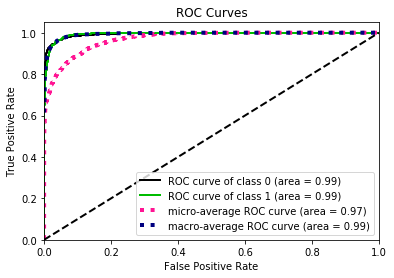

In [362]:
skplt.metrics.plot_roc_curve(test_y, y_predict_soft_prob5)
plt.show()

In [363]:
confusion_matrix(test_y, y_predict_soft5)

array([[   0, 1560],
       [   0, 1590]])

In [364]:
print("Accuracy : ", accuracy_score(test_y, y_predict_soft5))
print("Precision : ",precision_score(test_y, y_predict_soft5))
print("Recall : ",recall_score(test_y, y_predict_soft5))

print(classification_report(test_y, y_predict_soft5, target_names=target_names))

('Accuracy : ', 0.50476190476190474)
('Precision : ', 0.50476190476190474)
('Recall : ', 1.0)
                       precision    recall  f1-score   support

  Computer Technology       0.00      0.00      0.00      1560
Recreational Activity       0.50      1.00      0.67      1590

          avg / total       0.25      0.50      0.34      3150



<h3> Finding the best value of Gamma</h3>

In [365]:
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

target_names = ["Computer Technology", "Recreational Activity"]

In [366]:
grid5 = GridSearchCV(svm.SVC(), param_grid=dict(C=gamma_values, kernel=['linear']), cv=5)
grid5.fit(train_x5, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [367]:
print(grid5.best_score_)
print(grid5.best_estimator_)

0.973372781065
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [368]:
y_predict_best5 = grid5.predict(test_x5)
print(classification_report(test_y, y_predict_best5, target_names=target_names))
print("Accuracy Score: " + str(accuracy_score(test_y, y_predict_best5)))

                       precision    recall  f1-score   support

  Computer Technology       0.98      0.97      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150

Accuracy Score: 0.973650793651


In [369]:
confusion_matrix(test_y, y_predict_best5)

array([[1508,   52],
       [  31, 1559]])

<h3>Logistic Regression without regularization</h3>

In [370]:
logistic_clf = LogisticRegression(penalty='l2', C=1e10)
logistic_clf.fit(train_x5, train_y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [371]:
y_predict = logistic_clf.predict(test_x5)
y_predict_prob = logistic_clf.predict_proba(test_x5)

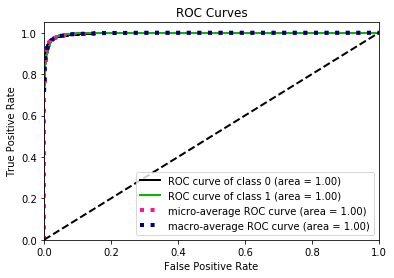

In [372]:
skplt.metrics.plot_roc_curve(test_y, y_predict_prob)
plt.show()

In [373]:
confusion_matrix(test_y, y_predict)

array([[1504,   56],
       [  34, 1556]])

In [374]:
print("Accuracy : ", accuracy_score(test_y, y_predict_log2))
print("Precision : ",precision_score(test_y, y_predict_log2))
print("Recall : ",recall_score(test_y, y_predict_log2))

print(classification_report(test_y, y_predict_log2, target_names=target_names))

('Accuracy : ', 0.96412698412698417)
('Precision : ', 0.95390288875230489)
('Recall : ', 0.97610062893081762)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.95      0.96      1560
Recreational Activity       0.95      0.98      0.96      1590

          avg / total       0.96      0.96      0.96      3150



<h3>Logistic Regression with L2 regularization</h3>

In [375]:
logistic_clf = LogisticRegression(penalty='l2', C=1000)
logistic_clf.fit(train_x5, train_y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [376]:
y_predict = logistic_clf.predict(test_x5)
y_predict_prob = logistic_clf.predict_proba(test_x5)

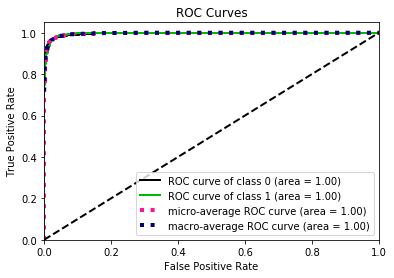

In [377]:
skplt.metrics.plot_roc_curve(test_y, y_predict_prob)
plt.show()

In [378]:
confusion_matrix(test_y, y_predict)

array([[1506,   54],
       [  33, 1557]])

In [379]:
print("Accuracy : ", accuracy_score(test_y, y_predict))
print("Precision : ",precision_score(test_y, y_predict))
print("Recall : ",recall_score(test_y, y_predict))

print(classification_report(test_y, y_predict, target_names=target_names))

('Accuracy : ', 0.97238095238095235)
('Precision : ', 0.96648044692737434)
('Recall : ', 0.97924528301886793)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.97      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150



<h3>Logistic Regression with L1 regularization</h3>

In [380]:
logistic_clf = LogisticRegression(penalty='l1', C=1000)
logistic_clf.fit(train_x5, train_y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [381]:
y_predict = logistic_clf.predict(test_x5)

y_predict_prob = logistic_clf.predict_proba(test_x5)

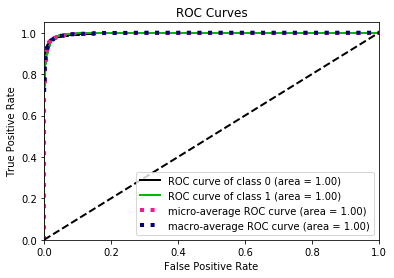

In [382]:
skplt.metrics.plot_roc_curve(test_y, y_predict_prob)
plt.show()

In [383]:
confusion_matrix(test_y, y_predict)

array([[1504,   56],
       [  34, 1556]])

In [384]:
print("Accuracy : ", accuracy_score(test_y, y_predict))
print("Precision : ",precision_score(test_y, y_predict))
print("Recall : ",recall_score(test_y, y_predict))

print(classification_report(test_y, y_predict, target_names=target_names))

('Accuracy : ', 0.97142857142857142)
('Precision : ', 0.9652605459057072)
('Recall : ', 0.97861635220125787)
                       precision    recall  f1-score   support

  Computer Technology       0.98      0.96      0.97      1560
Recreational Activity       0.97      0.98      0.97      1590

          avg / total       0.97      0.97      0.97      3150

